In [1]:
import pandas as pd  #pacotes
import numpy as np   #calculo numerico
import glob          #listas
#Codigo para declarar um pyarrow parquet - Willian - 29/05/2018
import pyarrow.parquet as pq
#uproot serve para ler a partir o python um arquivo em tree root
#import uproot
import os, sys
from os import path
import datetime
import matplotlib as mp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [9]:
%run def_functions.ipynb
%run def_functions_hits.ipynb

In [3]:
#find a y value in list patches from x value
def fnc_find_y(patches, value_x):
    value_y = 0
    for tupla in patches:
        #print(tupla[0],tupla[1],tupla)
        if (value_x < tupla[0]):
            value_y = tupla[1]
            break
    #print(value_x, value_y)
    return value_y

## histogram for prompt density

61.45215100965759 1337.7332240825515 36.57503553084469
0 5.0 0.0 0.0
5.0 5.0 209.0 0.0
5.0 27.1 209.0 4618.900000000001
27.1 27.1 284.0 4618.900000000001
27.1 49.2 284.0 10895.300000000001
49.2 49.2 259.0 10895.300000000001
49.2 71.30000000000001 259.0 16619.200000000004
71.30000000000001 71.30000000000001 184.0 16619.200000000004
71.30000000000001 93.4 184.0 20685.600000000002
93.4 93.4 103.0 20685.600000000002
93.4 115.5 103.0 22961.9
115.5 115.5 59.0 22961.9
115.5 137.60000000000002 59.0 24265.800000000003
137.60000000000002 137.60000000000002 22.0 24265.800000000003
137.60000000000002 159.70000000000002 22.0 24752.000000000004
159.70000000000002 159.70000000000002 11.0 24752.000000000004
159.70000000000002 181.8 11.0 24995.100000000002
181.8 181.8 7.0 24995.100000000002
181.8 203.9 7.0 25149.800000000003
203.9 203.9 1.0 25149.800000000003
203.9 226.0 1.0 25171.9
226.0 226.0 0.0 25171.9


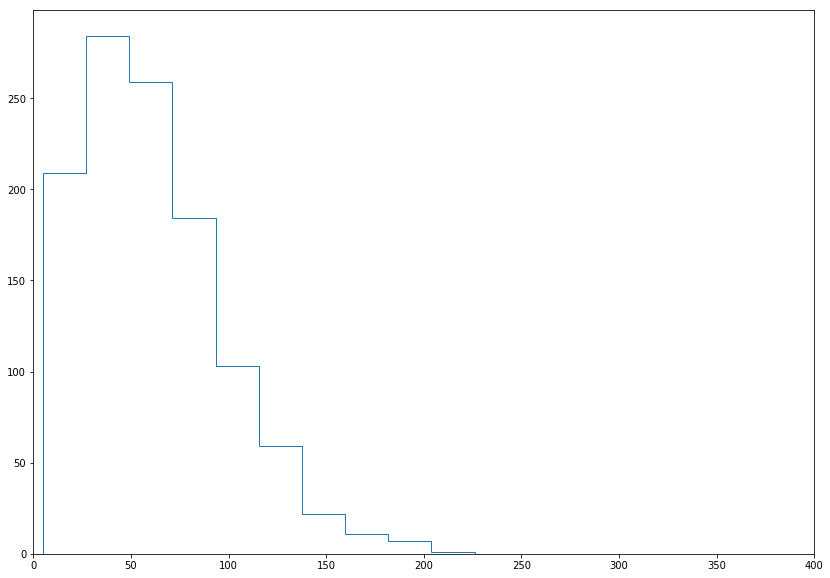

In [10]:
trigger_pmt = 5 #desconsiderar eventos de multiplicidade < 5 PMT; trigger_pmt = considera todos eventos

### Integrar para normalizar
### Para isso, multiplicar altura* Largura e somar tudo (soma de riemman)
### Como normalizar ??
### Estando normalizado, usar a altura para P(A)
### Lembrar posteriormente de propagar erro

list_sum = ['Positron_MeVHits.txt']
x = fnt_array_vet_hits_pmt(list_sum,trigger_pmt)[0]

prompt_mean=np.mean(x)
prompt_var=np.var(x)
prompt_std=np.std(x)
print(prompt_mean, prompt_var, prompt_std)

fig=plt.figure(figsize=(14,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([0, 400])
    
hist_bins = 10

#weights = np.ones_like(x) / float(len(x))
#weights = np.ones_like(x) / normal
#print(weights)
plt.hist(x, bins=hist_bins, alpha=1, histtype='step') #, weights=weights) 

p = ax.patches  # There are 10 patches
#print(p[0].get_xy())  # return a list of values in order [[xmin, y],[xpoint1, y],[xpoint2],...,[xmax, y]]
    
#print(fnc_find_y(p[0].get_xy(), 49)) #example of use user function

vx = 0 
normal = 0
for vxy in p[0].get_xy():
    if (vx != vxy[0]):
        normal += (vxy[0]-vx)*vxy[1]
    print(vx,vxy[0],vxy[1],normal)
    vx = vxy[0]



### Normalizacao

0 5.0 0.0 0.0
5.0 5.0 0.008302909196365765 0.0
5.0 27.1 0.008302909196365765 0.18349429323968341
27.1 27.1 0.011282422065874998 0.18349429323968341
27.1 49.2 0.011282422065874998 0.43283582089552086
49.2 49.2 0.01028925110937192 0.43283582089552086
49.2 71.30000000000001 0.01028925110937192 0.6602282704126404
71.30000000000001 71.30000000000001 0.007309738239862687 0.6602282704126404
71.30000000000001 93.4 0.007309738239862687 0.8217734855136057
93.4 93.4 0.004091864340792714 0.8217734855136057
93.4 115.5 0.004091864340792714 0.9122036874451247
115.5 115.5 0.0023438834573472796 0.9122036874451247
115.5 137.60000000000002 0.0023438834573472796 0.9640035118524997
137.60000000000002 137.60000000000002 0.000873990441722714 0.9640035118524997
137.60000000000002 159.70000000000002 0.000873990441722714 0.9833187006145716
159.70000000000002 159.70000000000002 0.0004369952208613573 0.9833187006145716
159.70000000000002 181.8 0.0004369952208613573 0.9929762949956076
181.8 181.8 0.000278087867820

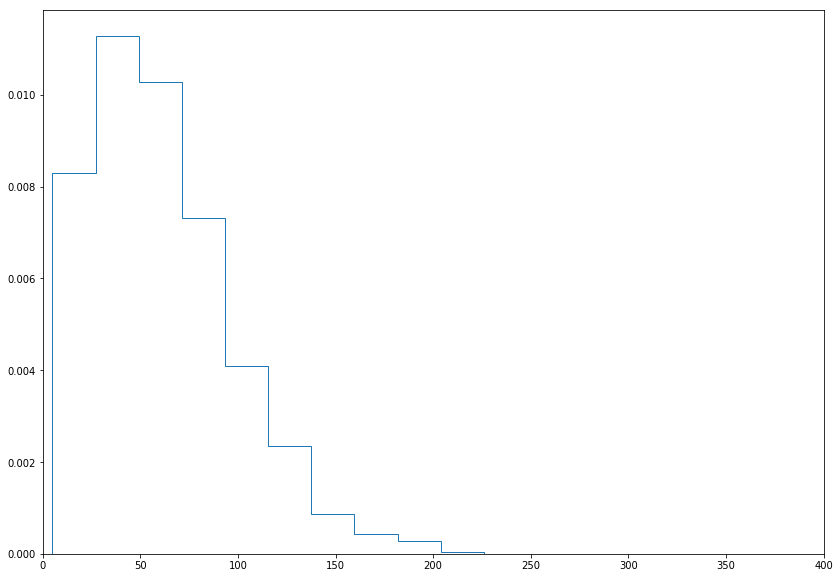

In [11]:

fig=plt.figure(figsize=(14,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([0, 400])
    
weights = np.ones_like(x) / normal
#print(weights)
plt.hist(x, bins=hist_bins, alpha=1, histtype='step', weights=weights) 

p = ax.patches  # There are 10 patches
#print(p[0].get_xy())  # return a list of values in order [[xmin, y],[xpoint1, y],[xpoint2],...,[xmax, y]]


vx = 0 
normal2 = 0
for vxy in p[0].get_xy():
    if (vx != vxy[0]):
        normal2 += (vxy[0]-vx)*vxy[1]
    print(vx,vxy[0],vxy[1],normal2)
    vx = vxy[0]


## histogram for delay density

87.81511746680286 3577.5317020035664 59.81247112436976
202.0
0 5.0 0.0 0.0
5.0 5.0 228.0 0.0
5.0 35.375 228.0 6925.5
35.375 35.375 202.0 6925.5
35.375 65.75 202.0 13061.25
65.75 65.75 166.0 13061.25
65.75 96.125 166.0 18103.5
96.125 96.125 122.0 18103.5
96.125 126.5 122.0 21809.25
126.5 126.5 102.0 21809.25
126.5 156.875 102.0 24907.5
156.875 156.875 88.0 24907.5
156.875 187.25 88.0 27580.5
187.25 187.25 49.0 27580.5
187.25 217.625 49.0 29068.875
217.625 217.625 22.0 29068.875
217.625 248.0 22.0 29737.125
248.0 248.0 0.0 29737.125


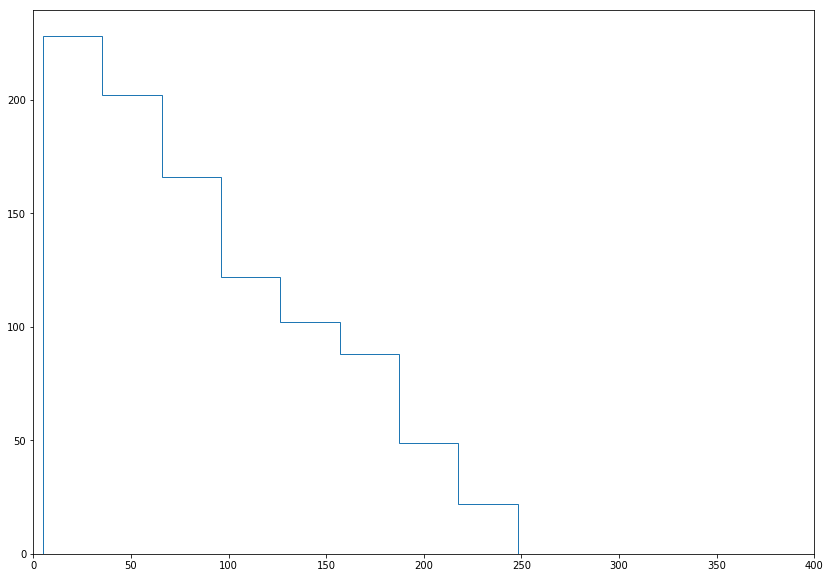

In [16]:
trigger_pmt = 5

### Integrar para normalizar
### Para isso, multiplicar altura* Largura e somar tudo (soma de riemman)
### Como normalizar ??
### Estando normalizado, usar a altura para P(A)
### Lembrar posteriormente de propagar erro

list_sum = ['NeutronHits.txt']
x = fnt_array_vet_hits_pmt(list_sum,trigger_pmt)[0]  #vetor: 0 = hits, 1 = Multiplicidade PMT, 2 = Energia dos hits   

delay_mean=np.mean(x)
delay_var=np.var(x)
delay_std=np.std(x)
print(delay_mean, delay_var, delay_std)

hist_bins = 8

fig=plt.figure(figsize=(14,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([0, 400])

#weights = np.ones_like(x) / float(len(x))

plt.hist(x, bins=hist_bins, histtype='step', alpha=1) #, weights=weights); #, rwidth=0.85)

d = ax.patches  # There are 10 patches
#print(d[0].get_xy())  # return a list of values in order [[xmin, y],[xpoint1, y],[xpoint2],...,[xmax, y]]
    
print(fnc_find_y(d[0].get_xy(), 49)) #example of use user function

vx = 0 
normal3 = 0
for vxy in d[0].get_xy():
    if (vx != vxy[0]):
        normal3 += (vxy[0]-vx)*vxy[1]
    print(vx,vxy[0],vxy[1],normal3)
    vx = vxy[0]



### Normalizacao

0 5.0 0.0 0.0
5.0 5.0 0.007667183697146282 0.0
5.0 35.375 0.007667183697146282 0.2328907048008183
35.375 35.375 0.0067928557316822265 0.2328907048008183
35.375 65.75 0.0067928557316822265 0.43922369765066593
65.75 65.75 0.005582247779501227 0.43922369765066593
65.75 96.125 0.005582247779501227 0.6087844739530157
96.125 96.125 0.004102615837946672 0.6087844739530157
96.125 126.5 0.004102615837946672 0.7334014300306458
126.5 126.5 0.003430055864512789 0.7334014300306458
126.5 156.875 0.003430055864512789 0.8375893769152218
156.875 156.875 0.002959263883109073 0.8375893769152218
156.875 187.25 0.002959263883109073 0.9274770173646599
187.25 187.25 0.001647771934913007 0.9274770173646599
187.25 217.625 0.001647771934913007 0.9775280898876425
217.625 217.625 0.0007398159707772688 0.9775280898876425
217.625 248.0 0.0007398159707772688 1.000000000000002
248.0 248.0 0.0 1.000000000000002


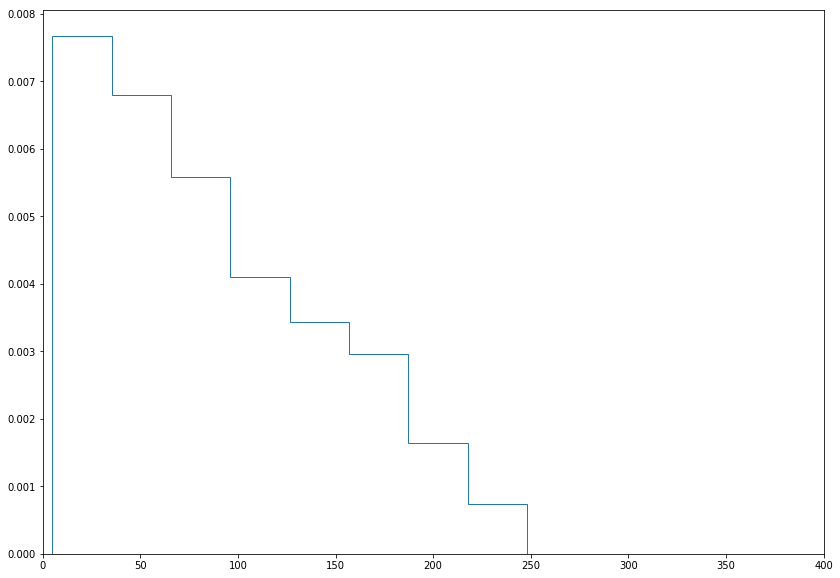

In [17]:
fig=plt.figure(figsize=(14,10))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim([0, 400])
    
weights = np.ones_like(x) / normal3
#print(weights)
plt.hist(x, bins=hist_bins, alpha=1, histtype='step', weights=weights) 

d = ax.patches  # There are 10 patches
#print(d[0].get_xy())  # return a list of values in order [[xmin, y],[xpoint1, y],[xpoint2],...,[xmax, y]]


vx = 0 
normal4 = 0
for vxy in d[0].get_xy():
    if (vx != vxy[0]):
        normal4 += (vxy[0]-vx)*vxy[1]
    print(vx,vxy[0],vxy[1],normal4)
    vx = vxy[0]


## Time delay + background density

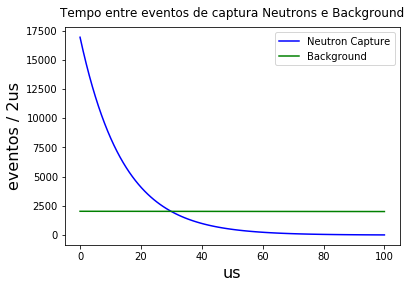

In [8]:

from sklearn import preprocessing

x_data = np.linspace(0, 100, num=100)
#y_dataN = preprocessing.normalize([fnt_fit_signalN(x_data)])
#y_dataB = preprocessing.normalize([fnt_fit_signalB(x_data)])
#y_dataNB = preprocessing.normalize([fnt_fit_signalN(x_data)+fnt_fit_signalB(x_data)])
#y_dataNB = preprocessing.normalize([fnt_fit_signal(x_data)])
#y_dataNB = preprocessing.normalize([y_dataB[0]*y_dataN[0]])
y_dataN = ([fnt_fit_signalN(x_data)])
y_dataB = ([fnt_fit_signalB(x_data)])


time_mean = 13 #(em us)
time_var = 5**2
time_std = 5

#y_dataB2 = []
#for v in y_dataB[0]:
#    y_dataB2.append(1-v)

#print(y_dataB[0],y_dataB2)
#y_dataNB=(y_dataB[0])*y_dataN[0]
#y_dataNB=y_dataB2*y_dataN[0]
#y_dataNB=y_dataB[0]*y_dataN[0]

### Calcular a densidade de tempo por neutron / (neutron+background) e usar como P(B|A)
### Aguardar Luis com histogramas dos tempos para calcular alfas e lambdas


plt.xlabel('us', size=16)
plt.ylabel('eventos / 2us', size=16)
plt.title('Tempo entre eventos de captura Neutrons e Background', y=1.02)
plt.plot(x_data, y_dataN[0], label='Neutron Capture', color='b')
plt.plot(x_data, y_dataB[0], label='Background', color='g')
#plt.plot(x_data, y_dataB2, label='not Background', color='c')
#plt.plot(x_data, y_dataB[0]*y_dataN[0], label='NC*Background', color='r')
#plt.plot(x_data, y_dataNB, label='NC*(not Background)', color='r')

plt.legend()
#print(y_data[0])

#print(fnc_find_y(t[0].get_xy(), 0)) #example of use user function


### merge e normalizacao

1.0000000000000007


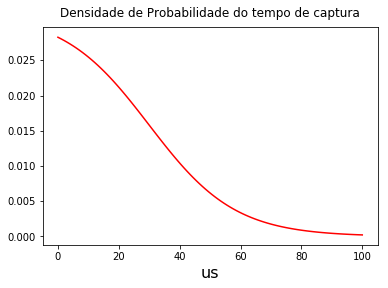

In [9]:
y_dataNB = []
ind = 0
for v in y_dataN[0]:
    #print(ind,v)
    y_dataNB.append(v/(v+y_dataB[0][ind]))
    ind+=1
    
normal5 = 0
for vxy in y_dataNB:
    # print(normal5)
    normal5 += vxy

for iy in range(len(y_dataNB)):
   # print(iy,y_dataNB[iy])
    y_dataNB[iy]=y_dataNB[iy]/normal5
    
print(np.sum(y_dataNB))

plt.xlabel('us', size=16)
plt.title('Densidade de Probabilidade do tempo de captura', y=1.02)

plt.plot(x_data, y_dataNB, color='r')



# Rodar até aqui para funções genéricas de todo código


## Criando um arquivo pós-processed com pares de eventos

In [17]:

#periodo run OFF: 22-06-2020 - 17-08-2020  (reator OFF)
#periodo run ON : 18-08-2020 - 14-09-2020  (reator ON)

#yyyy=2020; mm=9; dd=2 #Total de registros: 16210102
#yyyy=2020; mm=7; dd=2 #Total de registros: 16289236

#yyyy=2020; mm=8; dd=24 #pair individual
yyyy=2020; mm=6; dd=29 #pair individual

sDate = '{0:d}-{1:0>2d}-{2:0>2d}'.format(yyyy,mm,dd)
lista = find_interval_date(sDate,sDate)


indf=1

pair=[[] for x in range(80)]
event_pair = 0
subtotal_regs = 0
total_regs = 0
pairset = 1

print(datetime.datetime.now())


for file in lista:
    df = pd.read_parquet(file)
    i_epoc = int(extract_epoch(file))/1000
    print(indf,file,datetime.datetime.fromtimestamp(i_epoc).day,
          datetime.datetime.fromtimestamp(i_epoc).month,datetime.datetime.fromtimestamp(i_epoc).year)
    #print(file[28:60]+'_pair.parq')
    #break
    
    vd = str(datetime.datetime.fromtimestamp(i_epoc).day)+'-'+str(datetime.datetime.fromtimestamp(i_epoc).month)
    
    ev2 = [0 for x in range(80)] #[0,0,0,0,0]
    
    dfl = df.values.tolist()
    subtotal_regs += len(dfl)
    total_regs += len(dfl)
    
    for index1 in range(len(dfl)):
        if (index1!=0):
            
            regfix = dfl[index1].copy()
            ev1 = ev2.copy()
            
            #ev2[0] = regfix['Total_p_charge']/77.96 #em  pe
            ev2[0] = regfix[7]/77.96 #em  pe
            #ev2[1] = regfix['Timestamp1']*16/1E3 #em us
            ev2[1] = regfix[1]*16/1E3 #em us

            ev2[2] = fnc_find_y(p[0].get_xy(),ev1[0]) #probabilidade de ocorrência nesta energia (pelo PDF prompt)
            ev2[3] = fnc_find_y(d[0].get_xy(),ev2[0]) #probabilidade de ocorrência nesta energia (pelo PDF delay)
            ev2[4] = 0
            #totalTime_ON += ev2[1]
            if (int(ev2[1])<100):
                ev2[4] = y_dataNB[int(ev2[1])] #probabilidade temporal (pelo densidade de tempo)
            
            #ev2[5] = regfix['PMT01']; ev2[6] = regfix['PMT02']; ev2[7] = regfix['PMT03']; ev2[8] = regfix['PMT04']
            #ev2[9] = regfix['PMT05']; ev2[10] = regfix['PMT06']; ev2[11] = regfix['PMT07']; ev2[12] = regfix['PMT08']
            #ev2[13] = regfix['PMT09']; ev2[14] = regfix['PMT10']; ev2[15] = regfix['PMT11']; ev2[16] = regfix['PMT12']
            #ev2[17] = regfix['PMT13']; ev2[18] = regfix['PMT14']; ev2[19] = regfix['PMT15']; ev2[20] = regfix['PMT16']
            #ev2[21] = regfix['PMT17']; ev2[22] = regfix['PMT18']; ev2[23] = regfix['PMT19']; ev2[24] = regfix['PMT20']
            #ev2[25] = regfix['PMT21']; ev2[26] = regfix['PMT22']; ev2[27] = regfix['PMT23']; ev2[28] = regfix['PMT24']
            #ev2[29] = regfix['PMT25']; ev2[30] = regfix['PMT26']; ev2[31] = regfix['PMT27']; ev2[32] = regfix['PMT28']
            #ev2[33] = regfix['PMT29']; ev2[34] = regfix['PMT30']; ev2[35] = regfix['PMT31']; ev2[36] = regfix['PMT32']
            ev2[5] = regfix[8]; ev2[6] = regfix[9]; ev2[7] = regfix[10]; ev2[8] = regfix[11]
            ev2[9] = regfix[12]; ev2[10] = regfix[13]; ev2[11] = regfix[14]; ev2[12] = regfix[15]
            ev2[13] = regfix[16]; ev2[14] = regfix[17]; ev2[15] = regfix[18]; ev2[16] = regfix[19]
            ev2[17] = regfix[20]; ev2[18] = regfix[21]; ev2[19] = regfix[22]; ev2[20] = regfix[23]
            ev2[21] = regfix[24]; ev2[22] = regfix[25]; ev2[23] = regfix[26]; ev2[24] = regfix[27]
            ev2[25] = regfix[28]; ev2[26] = regfix[29]; ev2[27] = regfix[30]; ev2[28] = regfix[31]
            ev2[29] = regfix[32]; ev2[30] = regfix[33]; ev2[31] = regfix[34]; ev2[32] = regfix[35]
            ev2[33] = regfix[36]; ev2[34] = regfix[37]; ev2[35] = regfix[38]; ev2[36] = regfix[39]

            #ev2[37] = regfix['Saturated']; ev2[38] = regfix['Event_Number']
            ev2[37] = regfix[40]; ev2[38] = regfix[0]
            
            #print('2',datetime.datetime.now())
            qtde_PMTs = 0
            for ill in range(32):
                #campoPMT = 'PMT{0:0>2d}'.format(ill+1)
                #if (regfix[campoPMT]>77):
                if (ev2[5+ill]>77):
                    qtde_PMTs += 1
            ev2[39] = qtde_PMTs
            
            if (ev1[0]==0):
                continue
                    
            #print('3',datetime.datetime.now())
            i=int(ev1[0]) #prompt int energy
            j=int(ev2[0]) #delay int energy
            t=int(ev2[1]) #time interval - 13/09/2021
   
            ### chi sqr
            chi_sq_calc = ((i - prompt_mean)**2)/prompt_mean + ((j - delay_mean)**2)/delay_mean + ((t - time_mean)**2)/time_mean
                       
            event_pair+=1

            pair[0].append(event_pair)

            pair[1].append(ev1[5]); pair[2].append(ev1[6]);  pair[3].append(ev1[7]);  pair[4].append(ev1[8])
            pair[5].append(ev1[9]); pair[6].append(ev1[10]); pair[7].append(ev1[11]); pair[8].append(ev1[12])
            pair[9].append(ev1[13]);pair[10].append(ev1[14]);pair[11].append(ev1[15]);pair[12].append(ev1[16])
            pair[13].append(ev1[17]);pair[14].append(ev1[18]);pair[15].append(ev1[19]);pair[16].append(ev1[20])
            pair[17].append(ev1[21]);pair[18].append(ev1[22]);pair[19].append(ev1[23]);pair[20].append(ev1[24])
            pair[21].append(ev1[25]);pair[22].append(ev1[26]);pair[23].append(ev1[27]);pair[24].append(ev1[28])
            pair[25].append(ev1[29]);pair[26].append(ev1[30]);pair[27].append(ev1[31]);pair[28].append(ev1[32])
            pair[29].append(ev1[33]);pair[30].append(ev1[34]);pair[31].append(ev1[35]);pair[32].append(ev1[36])
            
            pair[33].append(ev1[0] * 77.96)  # em DUQ
            pair[34].append(ev1[0])  #em pe
            pair[35].append(ev1[2])  #PDF do prompt
            pair[36].append(ev1[39])  #multiplicidade > 77DUQ
            pair[37].append(ev1[37])  #satured
            
            pair[38].append(ev2[5]); pair[39].append(ev2[6]);  pair[40].append(ev2[7]);  pair[41].append(ev2[8])
            pair[42].append(ev2[9]); pair[43].append(ev2[10]); pair[44].append(ev2[11]); pair[45].append(ev2[12])
            pair[46].append(ev2[13]);pair[47].append(ev2[14]);pair[48].append(ev2[15]);pair[49].append(ev2[16])
            pair[50].append(ev2[17]);pair[51].append(ev2[18]);pair[52].append(ev2[19]);pair[53].append(ev2[20])
            pair[54].append(ev2[21]);pair[55].append(ev2[22]);pair[56].append(ev2[23]);pair[57].append(ev2[24])
            pair[58].append(ev2[25]);pair[59].append(ev2[26]);pair[60].append(ev2[27]);pair[61].append(ev2[28])
            pair[62].append(ev2[29]);pair[63].append(ev2[30]);pair[64].append(ev2[31]);pair[65].append(ev2[32])
            pair[66].append(ev2[33]);pair[67].append(ev2[34]);pair[68].append(ev2[35]);pair[69].append(ev2[36])
            
            pair[70].append(ev2[0] * 77.96)  # em DUQ
            pair[71].append(ev2[0])  #em pe
            pair[72].append(ev2[3])  #PDF do delay
            pair[73].append(ev2[39])  #multiplicidade > 77DUQ
            pair[74].append(ev2[37])  #satured
            
            pair[75].append(ev2[1])  #tempo
            pair[76].append(chi_sq_calc)  #chi^2
            pair[77].append(ev2[4])  #PDF do tempo

            #pair[78].append(file)  #arquivo AngraRun
            pair[78].append('')  #arquivo AngraRun
            pair[79].append(ev1[38])  #EventRun
            
            #print('4',datetime.datetime.now())
            #if (event_pair>10):
                #break

    if ((indf % 1)==0)or(indf>=len(lista)):  # mod 1 (antes era mod 6), pois quero gerar individuais agora - 06/10/2021
        # dictionary of lists
        dict = {'Pair': pair[0],
                'p_PMT01': pair[1],  'p_PMT02': pair[2],  'p_PMT03': pair[3],  'p_PMT04': pair[4], 
                'p_PMT05': pair[5],  'p_PMT06': pair[6],  'p_PMT07': pair[7],  'p_PMT08': pair[8], 
                'p_PMT09': pair[9],  'p_PMT10': pair[10], 'p_PMT11': pair[11], 'p_PMT12': pair[12], 
                'p_PMT13': pair[13], 'p_PMT14': pair[14], 'p_PMT15': pair[15], 'p_PMT16': pair[16], 
                'p_PMT17': pair[17], 'p_PMT18': pair[18], 'p_PMT19': pair[19], 'p_PMT20': pair[20], 
                'p_PMT21': pair[21], 'p_PMT22': pair[22], 'p_PMT23': pair[23], 'p_PMT24': pair[24], 
                'p_PMT25': pair[25], 'p_PMT26': pair[26], 'p_PMT27': pair[27], 'p_PMT28': pair[28], 
                'p_PMT29': pair[29], 'p_PMT30': pair[30], 'p_PMT31': pair[31], 'p_PMT32': pair[32], 
                'p_Total_charge': pair[33],'p_Total_pe': pair[34],'p_PDF': pair[35], 'p_mPMTs': pair[36], 'p_satured': pair[37],
                'd_PMT01': pair[38], 'd_PMT02': pair[39], 'd_PMT03': pair[40], 'd_PMT04': pair[41], 
                'd_PMT05': pair[42], 'd_PMT06': pair[43], 'd_PMT07': pair[44], 'd_PMT08': pair[45], 
                'd_PMT09': pair[46], 'd_PMT10': pair[47], 'd_PMT11': pair[48], 'd_PMT12': pair[49], 
                'd_PMT13': pair[50], 'd_PMT14': pair[51], 'd_PMT15': pair[52], 'd_PMT16': pair[53], 
                'd_PMT17': pair[54], 'd_PMT18': pair[55], 'd_PMT19': pair[56], 'd_PMT20': pair[57], 
                'd_PMT21': pair[58], 'd_PMT22': pair[59], 'd_PMT23': pair[60], 'd_PMT24': pair[61], 
                'd_PMT25': pair[62], 'd_PMT26': pair[63], 'd_PMT27': pair[64], 'd_PMT28': pair[65], 
                'd_PMT29': pair[66], 'd_PMT30': pair[67], 'd_PMT31': pair[68], 'd_PMT32': pair[69], 
                'd_Total_charge': pair[70],'d_Total_pe': pair[71],'d_PDF': pair[72], 'd_mPMTs': pair[73], 'd_satured': pair[74],
                'd_timeInverval': pair[75],'chi_square': pair[76],'t_PDF': pair[77],
                'file_Run': pair[78], 'Event_Number': pair[79]
               }
 
        # creating a dataframe from dictionary
        dfw = pd.DataFrame(dict)
        #dfw.to_parquet('data/AngraRun_Pair_{0:d}-{1:0>2d}-{2:0>2d}_{3:d}.parq'.format(yyyy,mm,dd,pairset))
        dfw.to_parquet('data/'+file[28:60]+'_pair.parq', compression='gzip')

        print('Subotal de registros: '+str(subtotal_regs))
        pair=[[] for x in range(80)]
        event_pair = 0
        subtotal_regs = 0
        pairset += 1
        del dict
        
    
    indf+=1
    
            
    
print('Total de registros: '+str(total_regs))

print(datetime.datetime.now())
print('Fim')

2021-10-06 11:49:43.384892
1 /data/processed/2020_phase2/AngraRun_1593473325269_processed_v4.parq 29 6 2020
Subotal de registros: 342907
2 /data/processed/2020_phase2/AngraRun_1593447926656_processed_v4.parq 29 6 2020
Subotal de registros: 341612
3 /data/processed/2020_phase2/AngraRun_1593406151651_processed_v4.parq 29 6 2020
Subotal de registros: 339557
4 /data/processed/2020_phase2/AngraRun_1593458799880_processed_v4.parq 29 6 2020
Subotal de registros: 343426
5 /data/processed/2020_phase2/AngraRun_1593460643153_processed_v4.parq 29 6 2020
Subotal de registros: 342563
6 /data/processed/2020_phase2/AngraRun_1593467873801_processed_v4.parq 29 6 2020
Subotal de registros: 343624
7 /data/processed/2020_phase2/AngraRun_1593407986229_processed_v4.parq 29 6 2020
Subotal de registros: 338671
8 /data/processed/2020_phase2/AngraRun_1593440643584_processed_v4.parq 29 6 2020
Subotal de registros: 340448
9 /data/processed/2020_phase2/AngraRun_1593478783729_processed_v4.parq 29 6 2020
Subotal de r

In [315]:
fileparq = 'data/AngraRun_Pair_2020-09-02.parq'

lista = glob.glob(fileparq)

for file in lista[:10]:
    a = file
    df = pd.read_parquet(a)
    #print(df.columns)
    print(df.head(100)[])
    print(df.head(2)['d_PDF'],df.head(2)['d_Total_charge'],df.head(2)['d_mPMTs'],df.head(2)['d_timeInverval']/16*1E3,
         df.head(2)['t_PDF'],df.head(2)['p_PDF'],df.head(2)['p_Total_charge'],df.head(2)['p_mPMTs'],
         df.head(2)['file_Run'],df.head(2)['Event_Number'])
    s=df['file_Run'][1]
    print(s)
    df2 = pd.read_parquet(s)
    df3=df2.head(10)[df2['Event_Number']==df['Event_Number'][1]]
    print(df2.head(10)[df2['Event_Number']==df['Event_Number'][1]])
    print(df3['PMT01'],df3['PMT02'],df3['PMT03'],df3['PMT04'],
          df3['PMT05'],df3['PMT06'],df3['PMT07'],df3['PMT08'],
          df3['PMT09'],df3['PMT10'],df3['PMT11'],df3['PMT12'],
          df3['PMT13'],df3['PMT14'],df3['PMT15'],df3['PMT16'],
          df3['PMT17'],df3['PMT18'],df3['PMT19'],df3['PMT20'],
          df3['PMT21'],df3['PMT22'],df3['PMT23'],df3['PMT24'],
          df3['PMT25'],df3['PMT26'],df3['PMT27'],df3['PMT28'],
          df3['PMT29'],df3['PMT30'],df3['PMT31'],df3['PMT32'],
          df3['Total_p_charge'],df3['Timestamp1']
         )


    Event_Number  Pair    chi_square     d_PDF  d_PMT01  d_PMT02  d_PMT03  \
0              3     1  1.845470e+06  0.007327       -2      138      305   
1              4     2  2.520867e+05  0.007327       -6      113       50   
2              5     3  1.030361e+04  0.005990      143      395      352   
3              6     4  3.299782e+05  0.007327       69      155      195   
4              7     5  1.165283e+06  0.007327      -23        0        3   
5              8     6  2.742807e+05  0.007327       90       60       85   
6              9     7  1.001982e+06  0.007327       -5       71      230   
7             10     8  3.047962e+03  0.005990      112       54      121   
8             11     9  1.792474e+04  0.007327      -36      -22       90   
9             12    10  1.571510e+05  0.007327       -3        2        0   
10            13    11  2.842666e+05  0.002005      640      698      263   
11             3    12  8.490015e+05  0.007327       15      285      320   

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
